<a href="https://colab.research.google.com/github/pkruga/Movies_Project/blob/main/Movie__Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase 1 Project

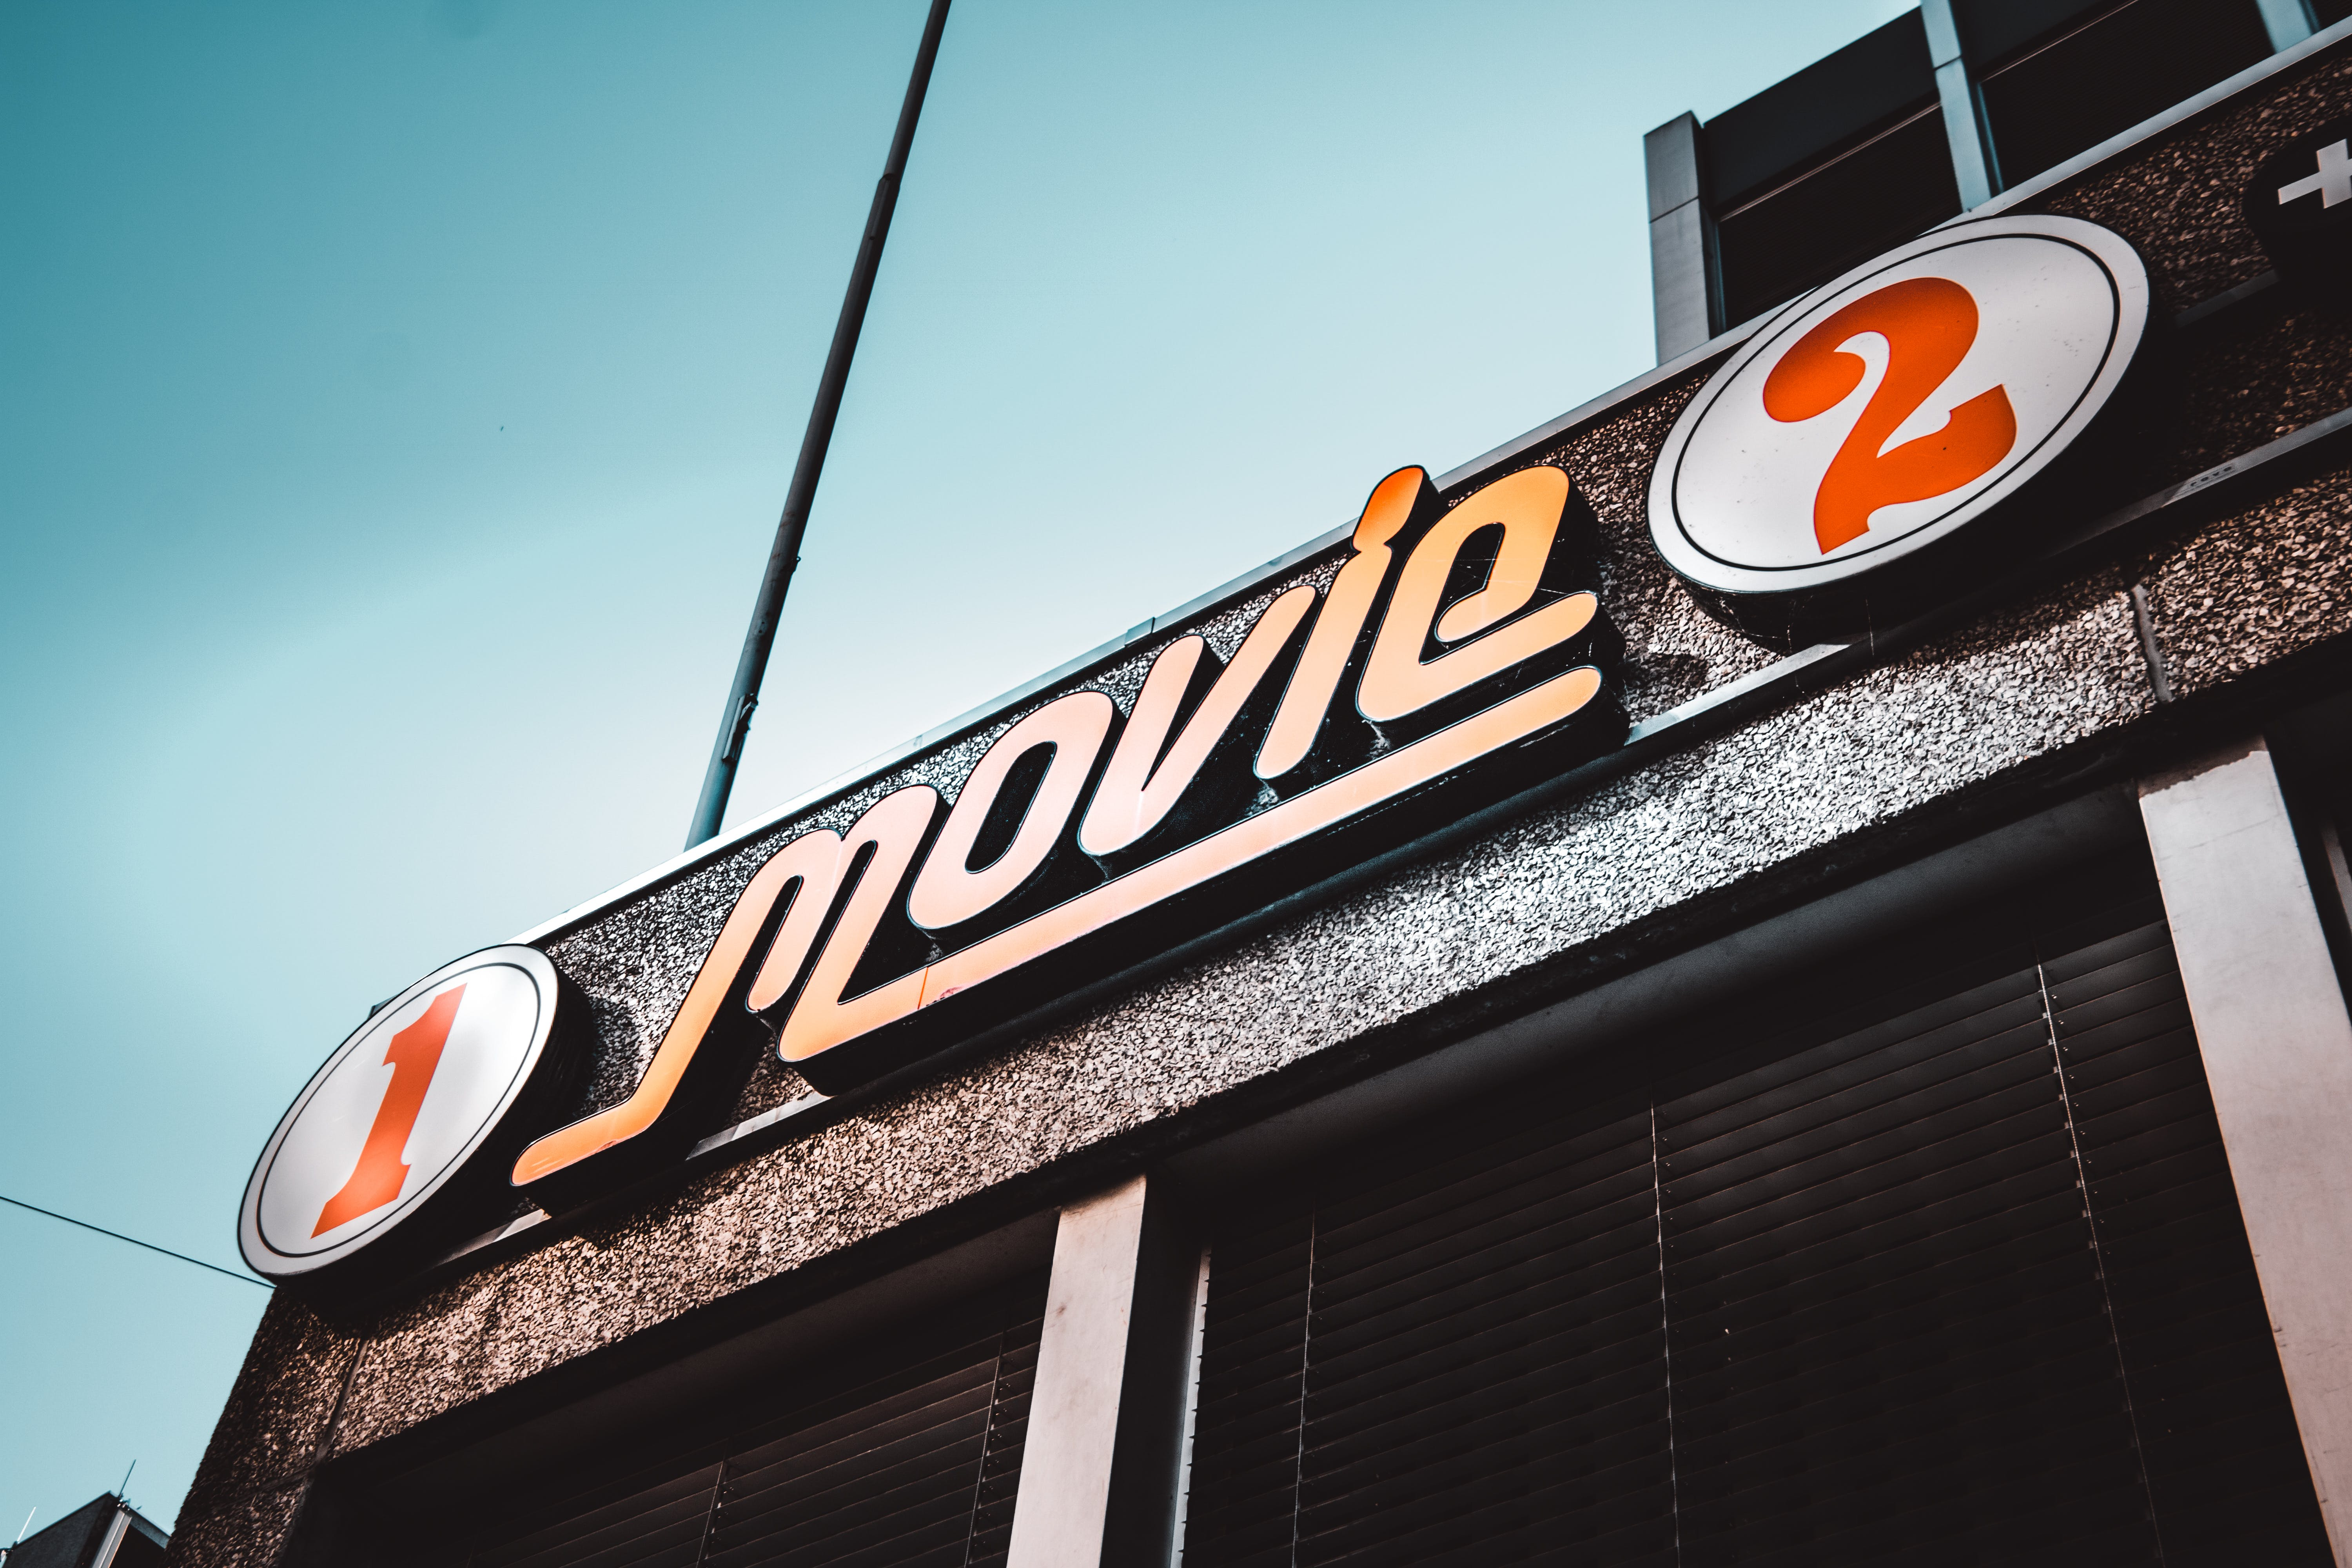
##Project Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

##Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

##The Data
We are going to fetch information on **movie titles**, **box office ratings** and the **box office gross** from the follwing files.
* imdb.title.basics
* imdb.title.ratings
* bom.movie_gross





##Data Gathering:
Load the data from the provided CSV files into your Jupyter Notebook using pandas.



```
#Importing necessary libraries
import pandas as pd
import numpy as np
```





```
boxoffice_gross = pd.read_csv('/content/bom.movie_gross.csv')
ratings = pd.read_csv('/content/title.ratings.csv')
title = pd.read_csv('/content/title.basics.csv')
```



Let's have a look at the tables for each of our datasets below.

In [ ]:
boxoffice_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy"


##Data Cleaning

Check for data redundancy including, duplicates, and missing values that might affect our data analysis stage. We do this for all of our datasets.



```
# Check for missing values
missing_values_bom = boxoffice_gross.isnull().sum()
print("Missing Values in bom.movie_gross.csv:")
print(missing_values_bom)

# Remove rows with missing values
missing_values_bom.dropna(inplace=True)

# Remove duplicates (if any)
boxoffice_gross.drop_duplicates(inplace=True)

# Display the cleaned dataset
print("\nCleaned bom.movie_gross.csv Dataset:")
display(boxoffice_gross.head())
```



Here's a snippet of our result using the table bom.movie_gross.csv:

before cleaning...
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

```
after cleaning..

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB

```
Outliers and missing values in columns:  

```

Missing Values in bom.movie_gross.csv:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

```
Here we see they aren't any values changed because the values identfied probably weren't considered for removal during cleaning and are still present after using the ```.info()``` method.


##Merging Data
Here we will load other data sets first and clean before merging. Merging of relevant datasets is based on common columns (e.g., movie title or ID) to create a comprehensive dataset for analysis. Other datasets such as budgets to comapre the net profit across genres.



```
budget = pd.read_csv('/content/movie_budgets.csv')
```





In [ ]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


We clean the data as shown in the data cleaning step.

Gross Box office revenue information table. We'll merge all data from our four tables, boxoffice_gross, title, ratings, and budget to give us a clearer picture of which movies performed well at the box office. We'll call this table **movies_dataset**.



```
# Merging relevant datasets based on common identifiers
movies_data = pd.merge(boxoffice_gross, title, how='inner', left_on='title', right_on='primary_title')
movies_data = pd.merge(movies_data, ratings, how='inner', on='tconst')

movies_data.info()
```

```
#Merging budget table to our current table
movies_dataset = pd.merge(movies_data, budget, left_on='title', right_on='movie')

movies_dataset.info()
```
We clean our merged table and print out our table using:

In [ ]:
# Check for missing values
print("Missing values in movies_dataset:")
print(movies_dataset.isnull().sum())

# Remove rows with missing values
movies_dataset.dropna(inplace=True)

# Display the cleaned dataset
print("\nCleaned Movies Dataset:")
display(movies_dataset.head())

As we can see there are duplicate columns with similar values thus we'll remove these columns in a final data cleaning step:

In [ ]:
# Create a copy of our movies_dataset
movies_dataset_copy = movies_dataset.copy()

# Identifying redundant columns in for domestic_gross
print(movies_dataset_copy[['domestic_gross_x', 'domestic_gross_y']].head())

# Drop the redundant column (domestic_gross_y')
movies_dataset_copy.drop(columns=['domestic_gross_y'], inplace=True)

# Rename the remaining column if necessary
movies_dataset_copy.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)

# Dropping redundant title columns
movies_dataset_copy.drop(columns=['primary_title', 'original_title', 'movie'], inplace=True)

# Dropping redundant year columns
movies_dataset_copy.drop(columns=['start_year', 'year'], inplace=True)

# Now, you can proceed with the analysis or any further processing
print("\nRemoved redundant Columns in Movies Dataset:")
display(movies_dataset_copy.head())


To preserve and demonstrate our data cleaning proccess, we created a copy of the original ```movies_dataset``` table.

Some of our data was inconsistent with "production_data" and "worldwide_gross" still being in string format. Here we cleaned the data so it matches the format of other numeric/float data types.

```
# Clean the 'production_budget' and 'worldwide_gross' columns
movies_dataset_copy['production_budget'] = movies_dataset_copy['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movies_dataset_copy['worldwide_gross'] = movies_dataset_copy['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
# Clean the 'foreign_gross' column, remove commas, and convert to float
movies_dataset_copy['foreign_gross'] = movies_dataset_copy['foreign_gross'].str.replace(',', '').astype(float)
# Now, you can proceed with the data analysis
```


To prepare our data for analysis step we created a new column called "total_gross" where we add the values between the "domestic_gross" and "foreign_gross". While the "Worldwide_gross" column serves a similar function, there are inconsistencies between "total_gross" and "Worldwide_gross".

In [ ]:
# Create new column 'total_gross' by adding 'domestic_gross' and 'worldwide_gross'
movies_dataset_copy['total_gross'] = movies_dataset_copy['domestic_gross'] + movies_dataset_copy['foreign_gross']

# Display the first few rows to verify the new column
print(movies_dataset_copy.head())

Our other column is the "net_revenue" where we get the actual revenue generated after the "production_budget" of a movie has been subtracted from our "total_gross".

In [ ]:
# Create new column 'net_revenue' by subtracting 'total_gross' and 'production_budget'
movies_dataset_copy['net_revenue'] = movies_dataset_copy['total_gross'] - movies_dataset_copy['production_budget']

# Display the first few rows to verify the new column
print(movies_dataset_copy.head())

##Data Analysis
From our merged data we'll look at the performance at the box office across genres, ratings, and estimated budgets. Our Analysis will cover the following points of interest:
* revenue generated by each movie genre.
* influence of ratings on gross earnings.
* whether release dates affect our gross earnings.


### Analysis by Genre
**Genre Analysis**: Analyze the distribution of movie genres and identify the most popular genres. You can calculate the frequency of each genre and visualize it using bar plots.

**Revenue by Genre**: Analyze the relationship between net revenue for different genres. You can calculate average revenue and budget for each genre and visualize it using grouped bar plots or box plots.



```
import matplotlib.pyplot as plt
import seaborn as sns
```



```
# Genre Analysis

# Extract genre data and preprocess (assuming genres are comma-separated)
genres = movies_dataset_copy['genres'].str.split(',').explode().str.strip()

# Calculate the frequency of each genre
genre_counts = genres.value_counts()

# Plot the frequency distribution using a bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

```

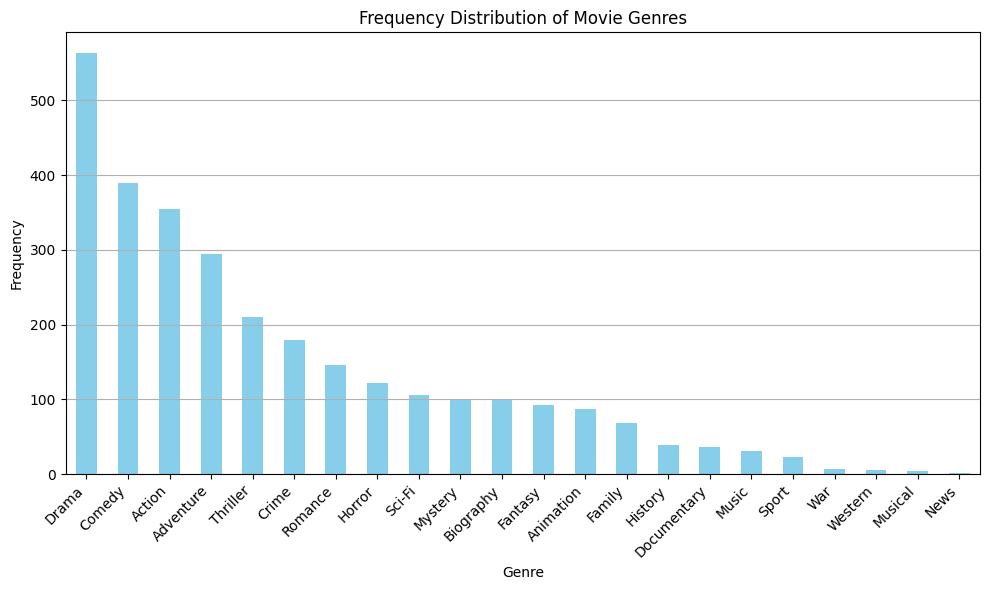

We can see the most popular genres are drama and comedy as per how many films feature each of the genres in the list.

```
# Revenue analysis by Genre

# Extract unique genres
genres = movies_dataset_copy['genres'].str.split(',').explode().str.strip().unique()

# Create an empty DataFrame to store the average net revenue for each genre
genre_data = pd.DataFrame(columns=['Genre', 'Average Net Revenue'])

# Iterate over each selected genre
for genre in genres:
    # Filter the data for the current genre
    genre_subset = movies_dataset_copy[movies_dataset_copy['genres'].str.contains(genre)]

    # Calculate the average net revenue for the current genre
    average_net_revenue = genre_subset['net_revenue'].mean()

    # Append the results to the genre_data DataFrame
    genre_data = genre_data.append({'Genre': genre, 'Average Net Revenue': average_net_revenue}, ignore_index=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(genre_data['Genre'], genre_data['Average Net Revenue'], color='lightgreen')
plt.title('Average Net Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Net Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
```

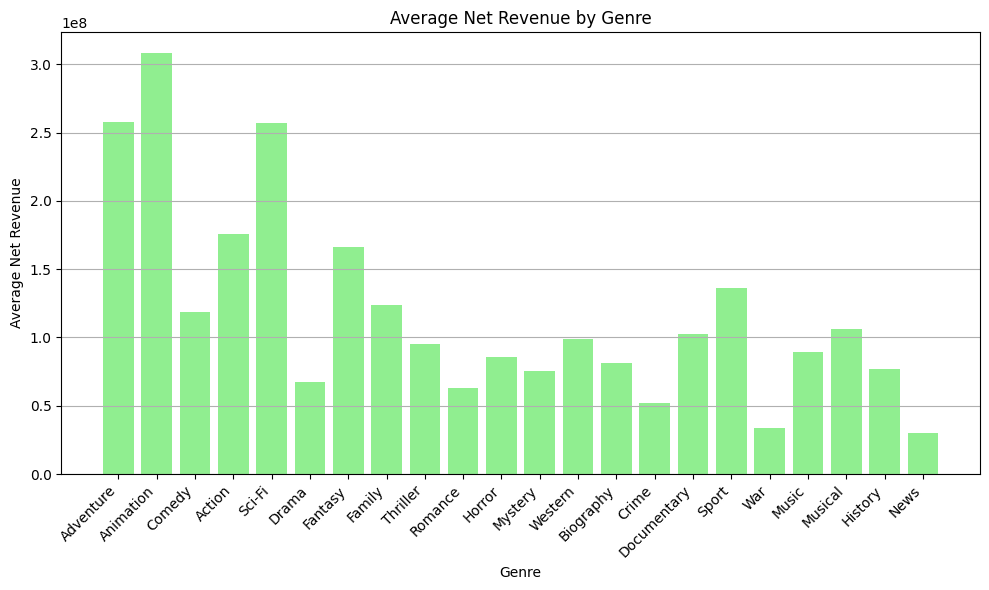

We see that Adventure, Animation, Action, and Sci-Fi are the most popular genres. Showing that they are the most likely to attract audiences.

These figures contradict our earlier observation of most movies featuring comedy and drama genres proving that they are common but not necessarily popular.

## Analysis by Rating
Ratings give us insight into how audience and critics' opinion of a movie affected it's performance in revenue.

**Rating Analysis**: Explore the distribution of movie ratings (averagerating) and identify any trends or patterns. Using histograms or box plots to visualize the distribution.

**Rating vs. Revenue**: Analyze the relationship between movie ratings and revenue. Calculate average revenue for different rating categories and visualize it using box plots or scatter plots.

In [ ]:
# Correlation analysis between ratings and gross earnings
correlation = movies_dataset_copy['averagerating'].corr(movies_dataset_copy['total_gross'])

print(f"Correlation between average ratings and gross earnings: {correlation}")


The correlation coefficient between average ratings and gross earnings is approximately 0.21.

In simple terms, this positive correlation indicates that there is a weak to moderate relationship between the average ratings of movies and their gross earnings.

This means that the audience and critics' rating of a movie does not necessarily affect it's revenue. However, it's important to note that the correlation is not very strong, suggesting that other factors besides ratings also play a role in determining the financial success of a movie.

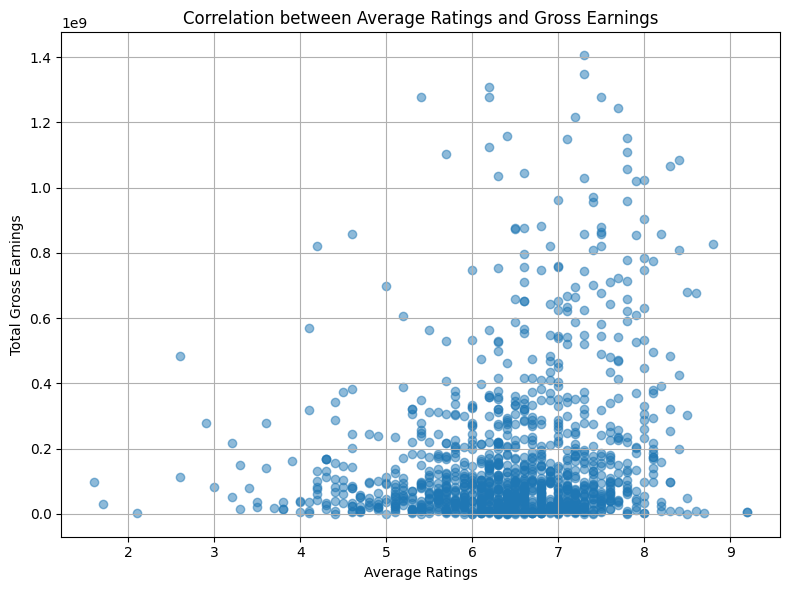

Ratings analysis by genre, here we'll try use the following code to plot a bar chart to see our ratings per single genre.

```
# Create an empty DataFrame to store genre ratings
genre_data = pd.DataFrame(columns=['Genre', 'Ratings'])

# Iterate over each genre
for genre in movies_dataset_copy['genres'].str.split(',').explode().str.strip().unique():
    # Calculate the average rating for the current genre
    average_rating = movies_dataset_copy[movies_dataset_copy['genres'].str.contains(genre)]['averagerating'].mean()
    
    # Append the results to the genre_data DataFrame
    genre_data = genre_data.append({'Genre': genre, 'Ratings': average_rating}, ignore_index=True)

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(genre_data['Genre'], genre_data['Ratings'], color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
```

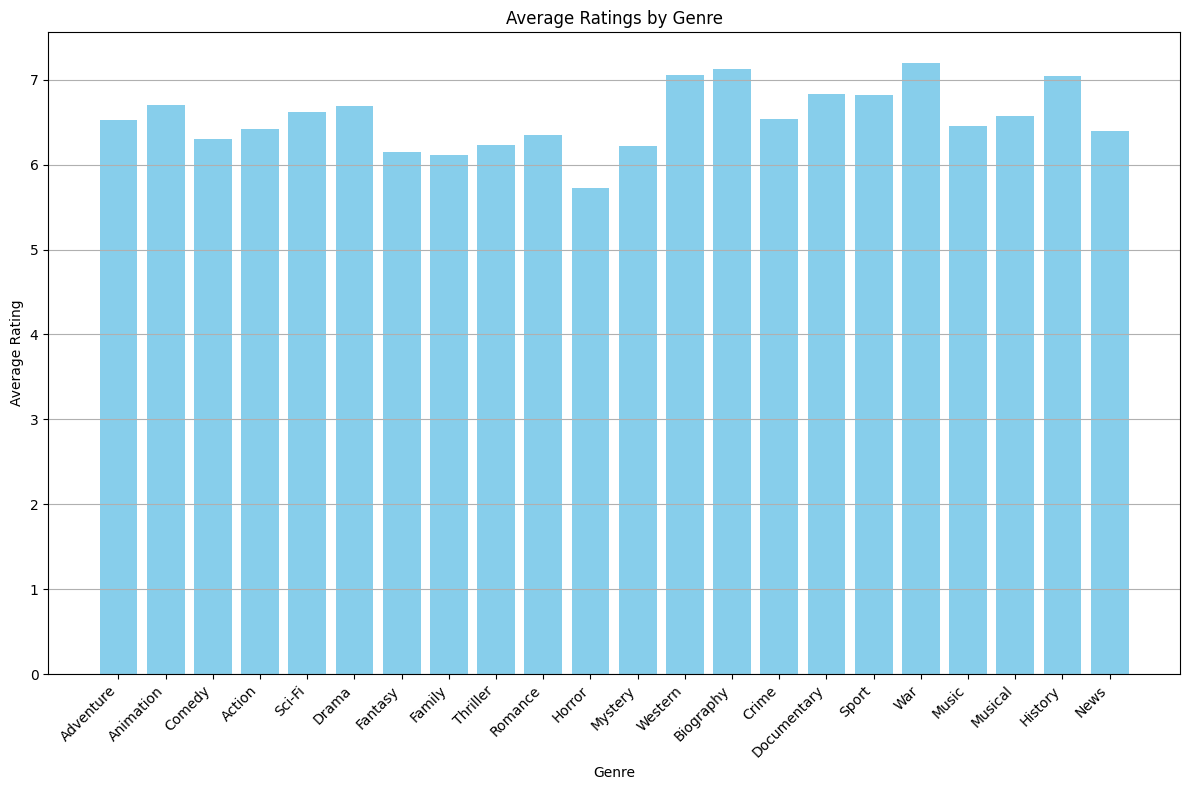

Our different genres are rated in a similar range even in combination with other genres, Western and biography are rated higher than most other genres. This can be stated as they attract positive reviews even when combined with other genres.

```
# Plotting box plot for distribution of movie ratings
plt.figure(figsize=(8, 6))
plt.boxplot(movies_dataset_copy['averagerating'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.yticks([])
plt.grid(axis='x')
plt.show()

# Extract specific statistics
Q1 = box_stats['whiskers'][0].get_xdata()[1]  # First quartile
median = box_stats['medians'][0].get_xdata()[0]  # Median (second quartile)
Q3 = box_stats['whiskers'][1].get_xdata()[1]  # Third quartile
IQR = Q3 - Q1  # Interquartile range

print("Q1 (25th percentile):", Q1)
print("Median (50th percentile):", median)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)`

```

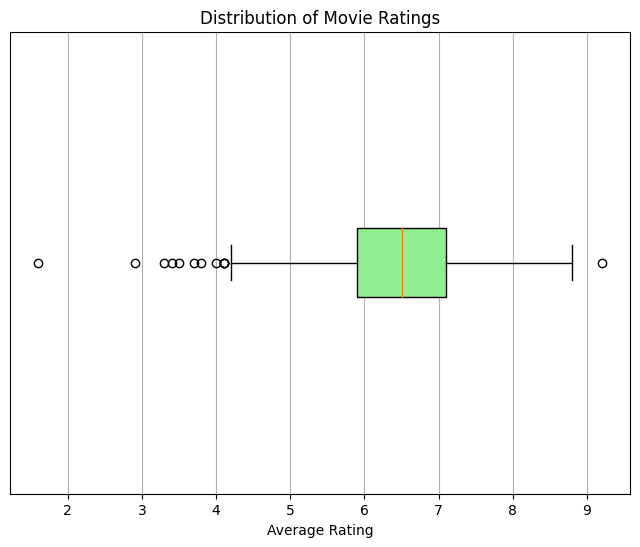

Q1 (25th percentile): 4.2
Median (50th percentile): 6.5
Q3 (75th percentile): 8.8
Interquartile Range (IQR): 4.6000000000000005

The value of Q1 (4.2) indicates that 25% of the movie ratings fall below this value, suggesting that a significant portion of the movies have ratings lower than 4.2. The value of Q3 (8.8) indicates that 75% of the movie ratings fall below this value, suggesting that the majority of movies have ratings lower than 8.8. The interquartile range (IQR), calculated as Q3 - Q1, measures the spread of the middle 50% of the data. In this case, the IQR is approximately 4.6, indicating the range in which the middle 50% of movie ratings fall.

Overall, these statistics suggest that the movie ratings exhibit variability, with a wide range of ratings observed across the dataset. The median rating of 6.5 indicates that the central tendency of the ratings distribution is around this value, with approximately half of the movies having ratings below 6.5 and the other half having ratings above it.

However note that there are more outliers in the past our Q1 value than our Q3 value. Showing that more movies are rated lower than higher even in our distribution. This is important to note as it indicates audiences and critics have a tendency to rate movies within our IQR range but will often score movies below that range as opposed to above it.

## Analysis by Release Date
**Release Date Analysis**: Analyze the distribution of movie releases over time and identify any seasonal trends. You can group movies by release year or month and visualize the distribution using line plots or bar plots.

**Budget vs. Revenue Trends Over Time**: Analyze how the relationship between production budget and revenue has changed over time. You can calculate average budget and revenue for different time periods and visualize it using line plots.

In [ ]:
# Perform ANOVA test
import scipy.stats as stats

# Group the data by release month
grouped_by_date = movies_dataset_copy.groupby('release_date')['total_gross'].apply(list)

# Perform ANOVA test
anova_result = stats.f_oneway(*grouped_by_date)

print("ANOVA Test Result:")
print(anova_result)

This indicates that there is a statistically significant difference in gross earnings among movies released in different months. The extremely low p-value (1.05e-16) suggests that the differences in gross earnings among months are highly unlikely to be due to random chance alone.
Therefore, we can conclude that release dates have a significant impact on gross earnings. However, it's important to perform further analysis or consider other factors to understand the specific patterns or trends associated with release dates and gross earnings.

```
#Revenue earnings by season

# Assuming 'release_date' column is in string format, convert it to datetime
movies_dataset_copy['release_date'] = pd.to_datetime(movies_dataset_copy['release_date'])

# Define a function to extract month from release date and categorize into seasons
def categorize_season(release_date):
    month = release_date.strftime('%b')  # Extract month abbreviation from release date
    if month in ['Dec', 'Jan', 'Feb']:  # Winter
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:  # Spring
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:  # Summer
        return 'Summer'
    else:  # Fall
        return 'Fall'

# Create a new column 'season' based on release dates
movies_dataset_copy['season'] = movies_dataset_copy['release_date'].apply(categorize_season)

# Group the data by season and calculate average gross earnings for each season
season_avg_gross = movies_dataset_copy.groupby('season')['total_gross'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
season_avg_gross.plot(kind='bar', color='lightgreen')
plt.title('Average Gross Earnings by Season')
plt.xlabel('Season')
plt.ylabel('Average Gross Earnings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

```

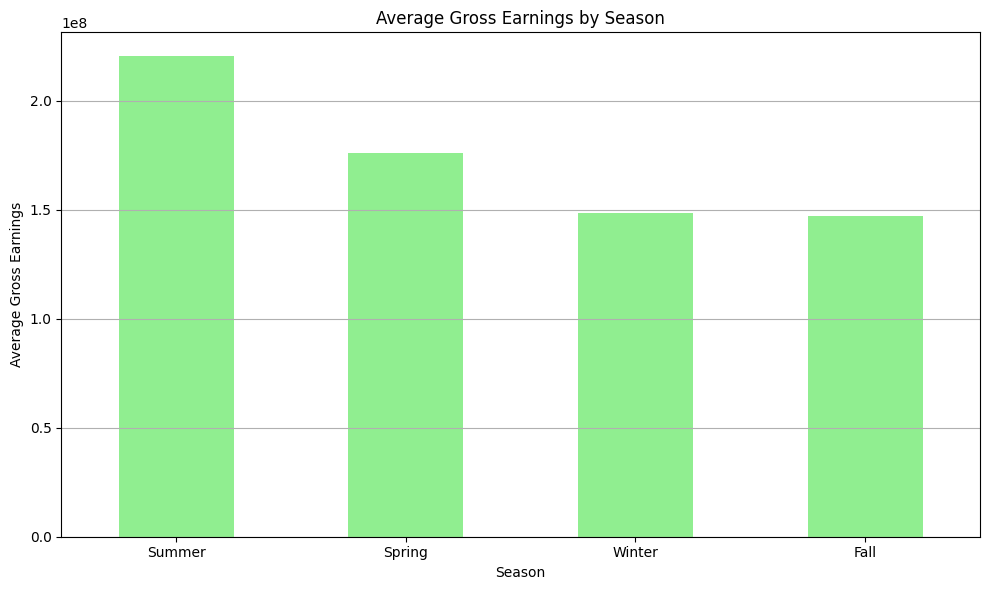

The most likely months that seem to make more money are the spring and Summer months between April and June. This by no means that these months are the best times to release films as we see strong revenue generation in October and November. In addition while these are the likely months for audiences to watch films, it is no indicator of success upon release.

```
# Create a new column 'season' based on release dates
movies_dataset_copy['season'] = movies_dataset_copy['release_date'].apply(categorize_season)

# Group the data by season and calculate average gross earnings for each season
season_avg_gross = movies_dataset_copy.groupby('season')['total_gross'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
season_avg_gross.plot(kind='bar', color='lightgreen')
plt.title('Average Gross Earnings by Season')
plt.xlabel('Season')
plt.ylabel('Average Gross Earnings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

```

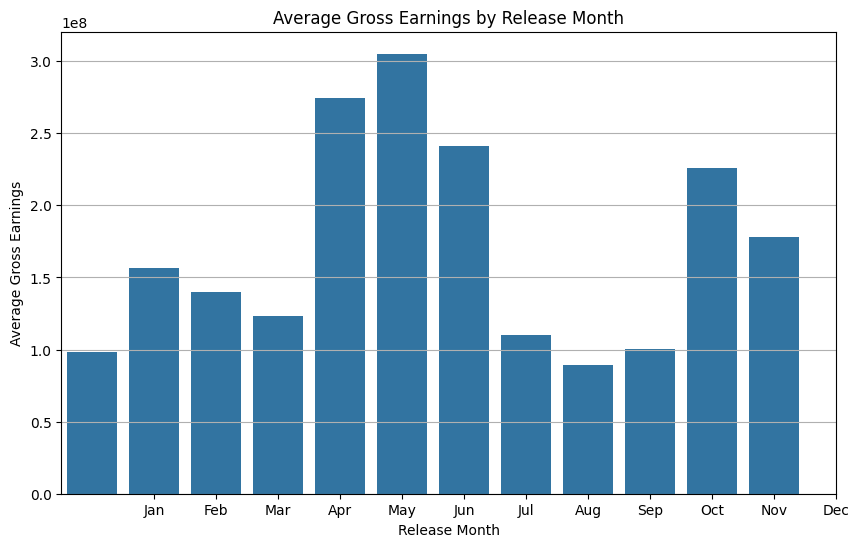

The most likely months that seem to make more money are the spring and Summer months between April and June. This by no means that these months are the best times to release films as we see strong revenue generation in October and November in the fall. In addition while these are the likely months for audiences to watch films, it is no indicator of success upon release.

# Conclusions
**Genre Popularity and Revenue Generation**:
Adventure, Animation, Action, and Sci-Fi are identified as the most popular genres based on the frequency of movie releases.
These genres are also among the top revenue generators, indicating that they have a strong appeal to audiences and can translate into higher box office earnings.

**Influence of Ratings on Gross Earnings**:
The correlation coefficient between average ratings and gross earnings is approximately 0.21, indicating a weak to moderate positive correlation.
This suggests that while there is some relationship between movie ratings and gross earnings, it is not very strong. Other factors beyond ratings also contribute to a movie's financial success.

**Effect of Release Dates on Gross Earnings**:
There is a statistically significant difference in gross earnings among movies released in different months.
The analysis suggests that release dates have a significant impact on gross earnings, with certain months showing higher revenue generation than others.
Spring and summer months, particularly April to June, appear to be the most profitable for movie releases, but strong revenue is also observed in October and November.

**Implications and Further Analysis**:
Movie studios and filmmakers can use these insights to make strategic decisions regarding genre selection, release timing, and marketing efforts.
While certain genres and release months show higher revenue potential, it's essential to conduct further analysis to understand specific trends and patterns comprehensively.
Factors such as competition, audience demographics, marketing strategies, and the quality of the film itself can also influence box office performance and should be considered in decision-making processes.

In conclusion, while genre selection, ratings, and release timing play significant roles in determining box office success, a holistic approach considering various factors is necessary for maximizing revenue and audience satisfaction in the film industry.

#Recommendations

Based on the conclusions drawn from the analysis, several recommendations can be made for movie studios, filmmakers, and other stakeholders in the film industry:

**Strategic Genre Selection**: Given the popularity and revenue-generating potential of the Adventure, Animation, Action, and Sci-Fi genres, Microsoft should consider investing in projects within these genres. Audience preferences and trends within these genres to ensure alignment with audience expectations.

**Focus on Quality**: While genre selection plays a crucial role, it's essential not to compromise on the quality of the film itself. Investing in compelling storytelling, high production values, talented cast and crew, and innovative filmmaking techniques can enhance the overall appeal of the movie and increase its chances of success, regardless of genre.

**Optimal Release Timing**: Microsoft studios should strategically schedule releases during peak months such as spring and summer, particularly April to June, to capitalize on higher audience turnout and maximize revenue potential. However, they should also consider factors such as competition and audience demographics when planning release dates.

**Marketing and Promotion**: Effective marketing and promotion strategies are essential to generate buzz and create anticipation for movie releases. The studio should invest in comprehensive marketing campaigns across various platforms, including social media, traditional advertising channels, and promotional events, to reach and engage with target audiences effectively.

**Continuous Analysis and Adaptation**: The film industry is dynamic, with audience preferences, market trends, and external factors constantly evolving. Movie studios should continuously monitor industry trends, conduct audience research, and analyze box office performance to adapt their strategies accordingly. Flexibility and agility in responding to changing market dynamics are essential for long-term success.

**Diversification and Innovation**: While certain genres may dominate the box office, there is also room for innovation and diversification. Studios should explore new and emerging genres, experiment with hybrid genres, and support diverse voices and storytelling perspectives to cater to a wide range of audience tastes and preferences. However in this endeavor it is important to note that it is better to support this as independent lower-budget features as a testing ground for audiences.

By implementing these recommendations and staying attuned to industry trends and audience feedback, movie studios and filmmakers can increase their chances of success in the competitive film industry landscape.